In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
from google.colab import auth
import gspread
from google.auth import default


In [37]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [41]:
worksheet = gc.open('deep').sheet1
rows = worksheet.get_all_values()

In [42]:
df = pd.DataFrame(rows[1:], columns = rows[0])
df = df.astype({'input':'int','output':'int'})

In [43]:
df.head()

,input,output
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51


In [44]:
X=df[{'input'}].values
Y=df[{'output'}].values
X

<ipython-input-44-213a97a87c9d>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[{'input'}].values
<ipython-input-44-213a97a87c9d>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Y=df[{'output'}].values


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [46]:
model = Sequential([
  Dense(8,activation = 'relu'),
  Dense(10,activation ='relu'),
  Dense(1)
])

In [47]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train1,Y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 774ms/step - loss: 2623.8286
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 2622.8174
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 2622.0879
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 2621.4844
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 2620.9531
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 2620.4688
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 2620.0166
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 2619.5886
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 2619.1853
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 2618.8079
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 2618.4446
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 2618.0886
Epoch 13/

<Axes: >

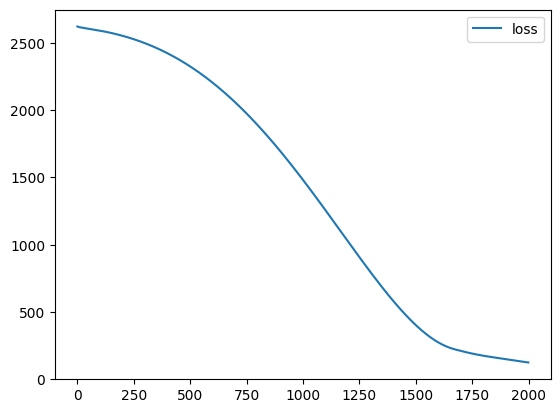

In [48]:
## Plot the loss
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [49]:
## Evaluate the model
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,Y_test)

1/1 [==============================] - 0s 132ms/step - loss: 171.1848


171.18482971191406

In [50]:
# Prediction
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 88ms/step


array([[198.33858]], dtype=float32)